# Loan Prediction


### Importing necessary libraries and modules


In [1]:

import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


### creating DataProvider class and reading csv file into data frames


In [2]:
class DataProvider():
    """Class for reading data from csv files into dataframes"""
    def read_csv(self,csv_file, csv_file1):
      global data_frame,data_frame1
      data_frame = pd.read_csv(csv_file)
      data_frame1 = pd.read_csv(csv_file1)
      

dp = DataProvider()
dp.read_csv('train_u6lujuX_CVtuZ9i.csv','test_Y3wMUE5_7gLdaTN.csv')



### Creating DataVisualizator class and taking a look at data in dataframes


In [3]:
class DataVisualizator():
   """Class for visualizing dataframe"""
   def show_head(self,df):
      print( df.head())
   def show_shape(self,df):
      print( df.shape)
   def describe(self,df):
      print(df.describe())
   def is_null(self,df):
      print(df.isnull().sum())
   def info(self,df):
      print(df.info())
 
dv= DataVisualizator()
dv.show_head(data_frame)



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
dv.show_shape(data_frame)

(614, 13)


In [5]:
dv.is_null(data_frame)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
dv.info(data_frame)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


### Creating DataManipulator class and processing  data

In [7]:
class DataManipulator():
     """Class for manipulating data in dataframe """
     def drop_column(self,df,column_name,axis,inplace):
      df.drop(column_name,axis,inplace=True)

     def drop_null_rows(self,df,inplace):
      df.dropna(inplace = True)

     def to_numeric_converter(self,df,df1):
         to_numeric = {'Male': 1, 'Female': 2,
         'Yes': 1, 'No': 2,
         'Graduate': 1, 'Not Graduate': 2,
         'Urban': 3, 'Semiurban': 2,'Rural': 1,
         'Y': 1, 'N': 0,
         '3+': 3, '0': 0, '1': 1, '2': 2}

         global train_dataframe, test_dataframe
         train_dataframe = df.applymap(lambda x: to_numeric.get(x) if x in to_numeric else x)
         test_dataframe = df1.applymap(lambda x: to_numeric.get(x) if x in to_numeric else x) 


In [8]:

dv.show_shape(data_frame)
dv.show_shape(data_frame1)
dm = DataManipulator()
#deleting rows with any null values from both datasets
dm.drop_null_rows(data_frame, inplace = True)
dm.drop_null_rows(data_frame1, inplace = True)
# checking size of the data_frames to determine if the deleted rows are a big part of our dataset
dv.show_shape(data_frame)
dv.show_shape(data_frame1)

(614, 13)
(367, 12)
(480, 13)
(289, 12)


In [9]:
#deleting loan_id column as it is useless for our modeling
dm.drop_column(data_frame,'Loan_ID',axis = 1, inplace = True)
dm.drop_column(data_frame1,'Loan_ID',axis = 1, inplace = True)

C:\Users\micha\AppData\Local\Temp\ipykernel_4768\3295670504.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(column_name,axis,inplace=True)


In [10]:
# converting all data types to numeric
dm.to_numeric_converter(data_frame,data_frame1)

### Creating correlation matrix on our cleaned data 

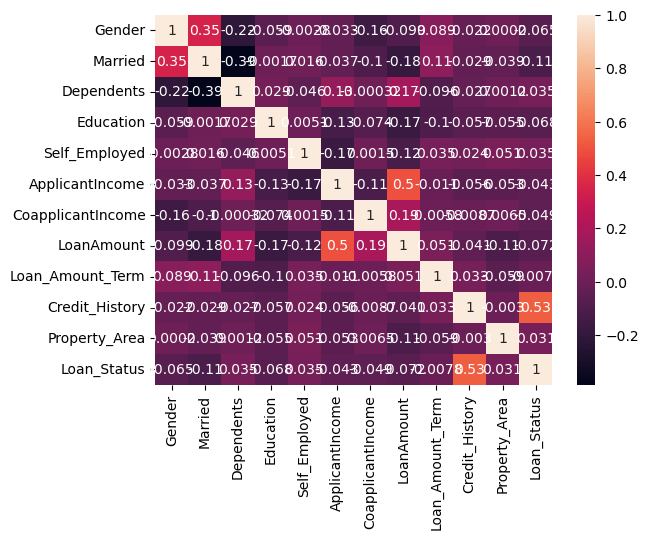

Gender               1.0
Married              1.0
Dependents           1.0
Education            1.0
Self_Employed        1.0
ApplicantIncome      1.0
CoapplicantIncome    1.0
LoanAmount           1.0
Loan_Amount_Term     1.0
Credit_History       1.0
Property_Area        1.0
Loan_Status          1.0
dtype: float64


In [11]:
#creating correlation matrix 
corr_matrix = train_dataframe.corr()
sn.heatmap(corr_matrix,annot = True)
plt.show()
print(corr_matrix.abs())


### Creating ModelTrainer class and trianing our models 


In [12]:
class ModelTrainer():

   def training_prep(self,df):
      global X_train, X_test, Y_train, Y_test, X, Y
      Y = df['Loan_Status']
      X = df.drop('Loan_Status', axis = 1)
      global X_train, X_test, Y_train, Y_test 
      X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

   
   def logistic_reg(self):

      global LR_SC
      
      LR = LogisticRegression()
      LR.fit(X_train, Y_train)

      Y_predict = LR.predict(X_test)

      LR_SC = LR.score(X_test, Y_test)

   def decision_tree(self):
      global DT_SC, DT

      DT = DecisionTreeClassifier()
      DT.fit(X_train, Y_train)

      Y_predict = DT.predict(X_test)

      DT_SC = accuracy_score(Y_predict,Y_test)
   def random_forest(self):
      global RF_SC
      RF = RandomForestClassifier()
      RF.fit(X_train, Y_train)

      Y_predict = RF.predict(X_test)


   
      RF_SC = accuracy_score(Y_predict,Y_test)


In [13]:
Mt = ModelTrainer()
Mt.training_prep(train_dataframe)

In [14]:
Mt.logistic_reg()
print(LR_SC)

0.7847222222222222


0.6805555555555556


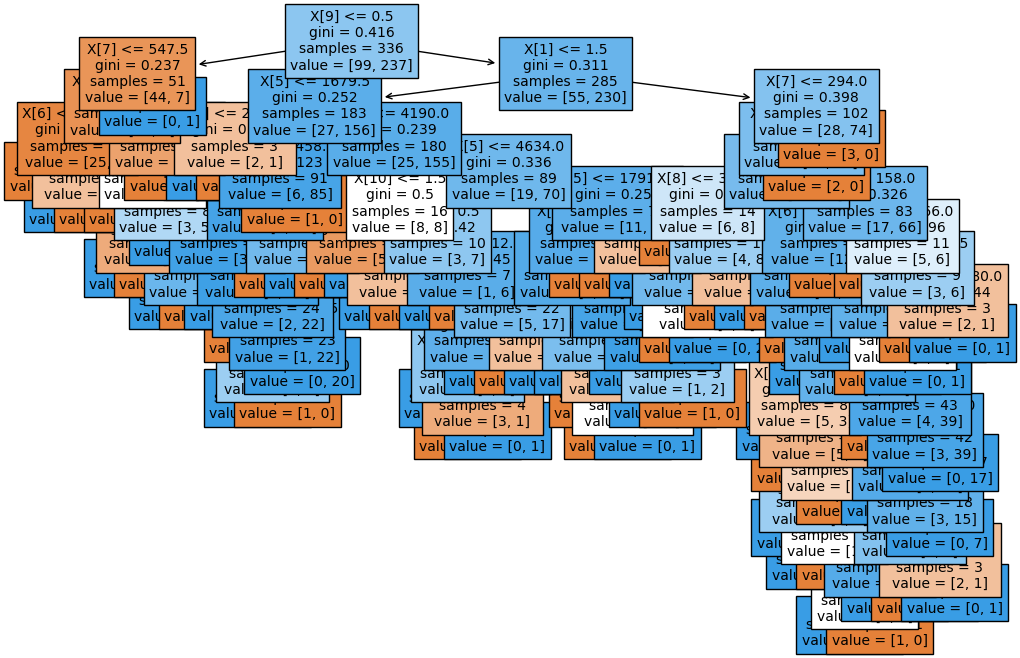

In [15]:
Mt.decision_tree()
print(DT_SC)
plt.figure(figsize=(12,8))
tree.plot_tree(DT, filled=True, fontsize=10)
plt.show()

In [16]:
Mt.random_forest()
print(RF_SC)


0.7847222222222222


### scores of random_forest and logical_regression models are close so we run them 100 times to make sure which one is better

In [18]:
class ScoreChecker():
   def train_100000_times(self):
      global result
      sum_LR = 0
      sum_RF = 0
      for i in range(100):
         Mt.logistic_reg()
         sum_LR+= LR_SC
      for i in range(100):
         Mt.random_forest()
         sum_RF+= RF_SC
      result = (sum_LR, sum_RF)

SC = ScoreChecker()
SC.train_100000_times()
print(result)


(78.47222222222229, 77.43055555555551)


## Testing

In [39]:
import unittest


class TestDataProvider(unittest.TestCase):
    """Testing DataProvider class"""
    def test_data_frame_different(self):
        dp = DataProvider()
        dp.read_csv('train_u6lujuX_CVtuZ9i.csv','test_Y3wMUE5_7gLdaTN.csv')
        self.assertNtotEqual(data_frame.shape[0],data_frame1.shape[0])
        

In [40]:
print(train_dataframe.dtypes)
        
        


Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
